In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')
import numpy as np

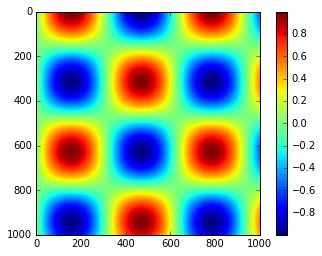

In [4]:
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])

plt.imshow(I)
plt.colorbar();

In [5]:
## Customizing a coor bar

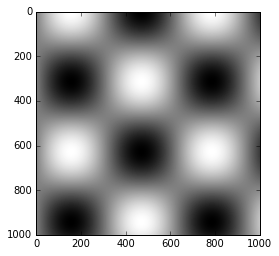

In [6]:
plt.imshow(I, cmap='gray');

In [7]:
## Choosing the colormap

In [8]:
# sequential colormaps are made up of one continuous sequence of colors, ex: binary, viridis
# divergent colormaps contain 2 distinct colors, which show positive and negative deviations from the mean, ex: RdBu, PuOr
# qualitative colormaps mix colors with no specific sequence, ex: jet, rainbow

In [9]:
from matplotlib.colors import LinearSegmentedColormap

def grayscale_cmap(cmap):
    """Return a grayscale version of the given colormap"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    # convert RGBA to perceived grayscale
    RGB_weight = [.299, .587, .114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
    
    return LinearSegmentedColormap.from_list(cmap.name + '_gray', colors, cmap.N)


def view_colormap(cmap):
    """Plot a colormap with its grayscale equivalent"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))
    
    fig, ax = plt.subplots(2, figsize=(6, 2),
                          subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

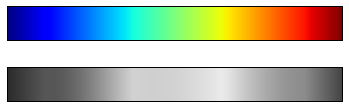

In [10]:
view_colormap('jet')

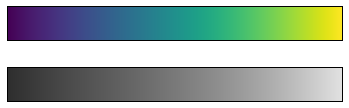

In [11]:
# better to use something like viridis, which has constant brightness throughout the range
view_colormap('viridis')

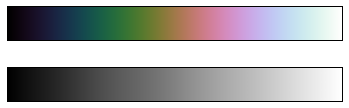

In [12]:
view_colormap('cubehelix')

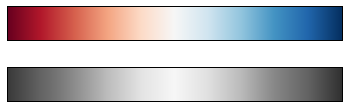

In [13]:
# dual color can be good for positive-negative, but if converted to grayscale will lose distinction
view_colormap('RdBu')

In [14]:
## Limits and extensions

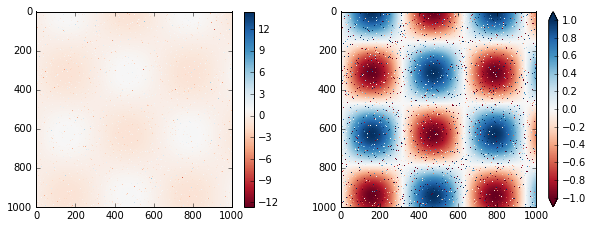

In [16]:
# make noise in 1% of image pixels
speckles = (np.random.random(I.shape) < .01)
I[speckles] = np.random.normal(0, 3, np.count_nonzero(speckles))

plt.figure(figsize=(10, 3.5))

plt.subplot(1, 2, 1)
plt.imshow(I, cmap='RdBu')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(I, cmap='RdBu')
plt.colorbar(extend='both')
plt.clim(-1, 1)

In [17]:
## Discrete Color Bars

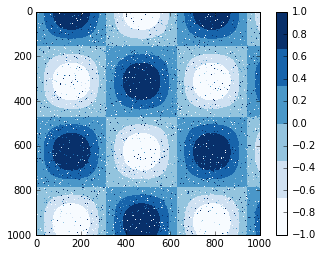

In [18]:
plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 6))
plt.colorbar()
plt.clim(-1, 1);

In [19]:
## Example: hand-written digits

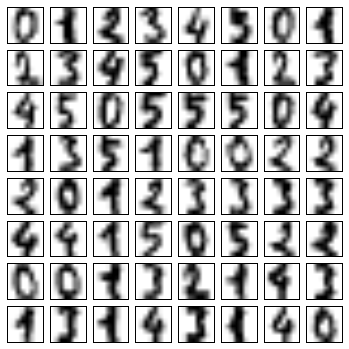

In [20]:
# load images of the digits 0 through 5 and visualize several of them
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)

fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

In [22]:
# each image has 64 pixels, so can be thought of as a point in 64d space
# but that is hard to visualize, so let's try to reduce the dimensionality
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)   # projects the digits into 2d space
projection = iso.fit_transform(digits.data)

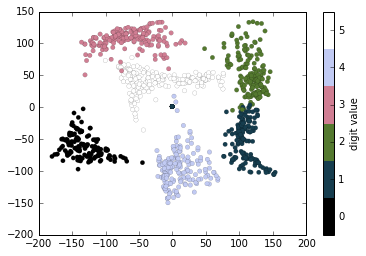

In [24]:
# plot results
plt.scatter(projection[:, 0], projection[:, 1], lw=0.1,
           c=digits.target, cmap=plt.cm.get_cmap('cubehelix', 6))
plt.colorbar(ticks=range(6), label='digit value')
plt.clim(-.5, 5.5)